Задача 2 - Дрва на одлучување и Наивен Баесов класификатор¶
Дадени се податоци за слетување на вселенско летало. Последната колона Landing го кажува начинот на кој е слетано леталото, автоматски или рачно. Оваа колона е излезната колона.

2.1: Нацртајте го дрвото на одлучување.

Дадени се податоци за ново слетување.

Stability - stab
Wind - head
Magnitude - low
Visibility - yes

2.2: Дали летатото да користи автоматски или рачен начин на слетување? Што вели дрвото на одлучување, а што вели наивниот Баесов класификатор?

2.3: Накратко опишете ја постапката по која постапивте за да го создадете дрвото на одлучување.

2.4: Зошто наивниот Беасов алгоритам се нарекува "наивен", а зошто "Баесов"?

In [1]:
import pandas as pd

df = pd.read_csv('shuttle-landing-control.data')
df

,Stability,Wind,Magnitude,Visibility,Landing
0,stab,head,low,no,auto
1,xstab,tail,low,yes,manual
2,stab,tail,low,yes,manual
3,xstab,head,medium,yes,manual
4,stab,head,low,yes,auto
5,stab,tail,medium,yes,auto
6,stab,head,medium,yes,auto
7,stab,head,medium,no,manual


# Дрво на одлучување

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [17]:
df.loc[df['Stability'] == 'stab', 'Stability'] = True
df.loc[df['Stability'] == 'xstab', 'Stability'] = False
df.loc[df['Wind'] == 'head', 'Wind'] = 0 # head == 0
df.loc[df['Wind'] == 'tail', 'Wind'] = 1 # tail == 1
df.loc[df['Visibility'] == 'yes', 'Visibility'] = True
df.loc[df['Visibility'] == 'no', 'Visibility'] = False
df.loc[df['Magnitude'] == 'low', 'Magnitude'] = 0 # low == 0
df.loc[df['Magnitude'] == 'medium', 'Magnitude'] = 1 # medium == 1

In [18]:
df

,Stability,Wind,Magnitude,Visibility,Landing
0,True,0,0,False,auto
1,False,1,0,True,manual
2,True,1,0,True,manual
3,False,0,1,True,manual
4,True,0,0,True,auto
5,True,1,1,True,auto
6,True,0,1,True,auto
7,True,0,1,False,manual


In [19]:
X = df.drop(columns = 'Landing')
X

,Stability,Wind,Magnitude,Visibility
0,True,0,0,False
1,False,1,0,True
2,True,1,0,True
3,False,0,1,True
4,True,0,0,True
5,True,1,1,True
6,True,0,1,True
7,True,0,1,False


In [20]:
y = df.Landing
y

0      auto
1    manual
2    manual
3    manual
4      auto
5      auto
6      auto
7    manual
Name: Landing, dtype: object

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 53, test_size = 1/8)

In [27]:
clf = DecisionTreeClassifier()

In [28]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [29]:
y_pred = clf.predict(X_test)

In [30]:
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=clf.predict(X_train)))
print('Accuracy Score on test data: ', accuracy_score(y_true=y_test, y_pred=y_pred))

Accuracy Score on train data:  1.0
Accuracy Score on test data:  1.0


[Text(0.4444444444444444, 0.9, 'Stability <= 0.5\ngini = 0.49\nsamples = 7\nvalue = [3, 4]\nclass = manual'),
 Text(0.3333333333333333, 0.7, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = manual'),
 Text(0.5555555555555556, 0.7, 'Wind <= 0.5\ngini = 0.48\nsamples = 5\nvalue = [3, 2]\nclass = auto'),
 Text(0.3333333333333333, 0.5, 'Visibility <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]\nclass = auto'),
 Text(0.2222222222222222, 0.3, 'Magnitude <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = auto'),
 Text(0.1111111111111111, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = auto'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = manual'),
 Text(0.4444444444444444, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = auto'),
 Text(0.7777777777777778, 0.5, 'Magnitude <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = auto'),
 Text(0.6666666666666666, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = manual'),
 Text(0.8888

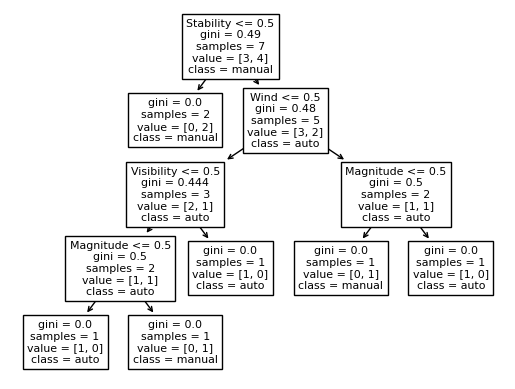

In [31]:
tree.plot_tree(clf, feature_names = X_train.columns, class_names = ['auto','manual'])

In [32]:
X_train, y_train

(  Stability Wind Magnitude Visibility
 0      True    0         0      False
 2      True    1         0       True
 7      True    0         1      False
 3     False    0         1       True
 6      True    0         1       True
 5      True    1         1       True
 1     False    1         0       True,
 0      auto
 2    manual
 7    manual
 3    manual
 6      auto
 5      auto
 1    manual
 Name: Landing, dtype: object)

In [33]:
X_pred = {'Stability':True,'Wind':0,'Magnitude':0,'Visibility':True}
X_pred = pd.DataFrame(X_pred,index = [0])
X_pred

,Stability,Wind,Magnitude,Visibility
0,True,0,0,True


In [34]:
y_pred_landing = clf.predict(X_pred)
y_pred_landing

array(['auto'], dtype=object)

Според дрвото на одлука, леталото треба да слета автоматски

# Наивен Баесов алгоритам

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn import tree

In [36]:
nb = MultinomialNB()

In [37]:
nb.fit(X_train, y_train)

MultinomialNB()

In [38]:
y_pred1 = nb.predict(X_test)

In [39]:
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=nb.predict(X_train)))
print('Accuracy Score on test data: ', accuracy_score(y_true=y_test, y_pred=y_pred1))

Accuracy Score on train data:  0.5714285714285714
Accuracy Score on test data:  0.0


In [40]:
y_pred_landing1 = nb.predict(X_pred)
y_pred_landing

array(['auto'], dtype=object)

 И со Наивниот Баесов класификатор се доби истото решение

In [41]:
X_test

,Stability,Wind,Magnitude,Visibility
4,True,0,0,True


In [43]:
print(y_pred, y_pred1, y_test)

['auto'] ['manual'] 4    auto
Name: Landing, dtype: object


_2.3_ Дрвото на одлучување се состои од корен, внатрешни јазли и листови. Секој јазол претставува одредена карактеристика според која се делат податоците во подмножества на наследниците. ID3 алгоритамот се состои од избирање на онаа карактеристика која во моментот дава најголема информациона придобивка, односно најмала средна ентропија на поделените подмножества. Тоа значи која карактеристика најдобро го дели множеството, т.ш 'нередот' во нив биде најмал. Крајните листови се добиваат кога во едно подмножество сите податоци имаат ист излез, па таа вредност соодветно се припишува на листот. Кога нареден влез со непознат излез ќе влезе во класификаторот, според изграденото дрво се добива претпоставка за излезот. 
    Од библиотеката sklearn.tree се користи класата DecisionTreeClassifier која креира модел. Потоа со функцијата fit се тренира моделот со податоците од множеството за тренирање и се создава дрвото на одлука. Со функцијата predict се прави предвидување на излезот кога на влез ќе ги донесеме податоците за тестирање на моделот, или сосема нови податоци.

_2.4_ Наивниот Баесов алгоритам е наречен 'наивен' бидејќи секоја карактеристика ја разгледува независно од останатите, односно заклучоците за дадена класа ги формира врз база на одделните признаци и нивните веројатности. Тој е наречен Баесов бидејќи се базира на Баесовата теорема, со која се пресметуваат условни веројатности за дадена вредност на признакот при познат исход. Се гледа застапеноста на дадена карактеристика за дадена излезна класа, па алгоритамот одлучува врз основа на поголема веројатност.